Part 2:

**Submitters:**

Alaa Ghanaiem ID 200764546

Anna Mosenzon ID 200320836

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as pl
from sklearn.neighbors import NearestNeighbors 
import numpy as np
from sklearn.metrics import davies_bouldin_score 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [20]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

path_data = '/content/drive/My Drive/Introduction to Data Science/data/clustering_data.csv'


Mounted at /content/drive


In [21]:
data  = pd.read_csv(path_data)
data = data.drop([data.columns[0]],axis=1)

scaled_data = StandardScaler().fit_transform(data)

# KMEANS

## KMEANS hyperparams

Find the optimal hyperparameters for kmeans, we check the best silhouette score value over multiple k values between (2 , 10)

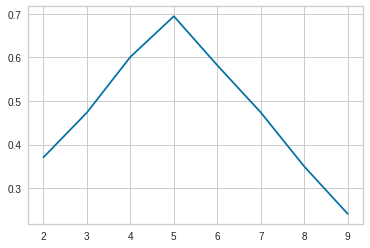

In [22]:
sil = []
kmax = 10

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(scaled_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_data, labels, metric = 'euclidean'))

pl.plot(range(2,10),sil)
pl.show()

The optimal k value is 5 (maximum silhouette value)

## KMEANS clustering

In [23]:
kmeans = KMeans(n_clusters = 5).fit(scaled_data)
kmean_labels = kmeans.labels_
kmeans_data = data.copy()
kmeans_data["label"] = kmeans.labels_


# DBSCAN

## dbscan hyperparam

We calculate the distance from each point to its closest neighbour using NearestNeighbors. The point itself is included in the two neighbours. 

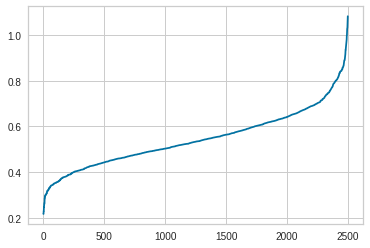

In [24]:
avg_dis = []

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
pl.plot(distances)



The optimal value for epsilon will be found at the point of maximum curvature, where the distance become too much far from the point itself.
In our case the point of maximum curvature is 0.7

We check multiple values for min points parameter.
We pick the value which gives the maximum silhouette value

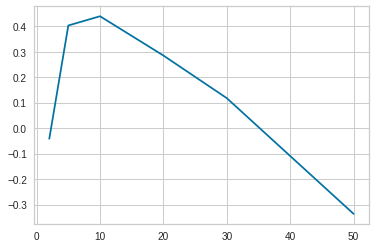

In [25]:
min_range = [2, 5, 10, 20, 30, 50]
db_sil = []

for minp in min_range:
  dbscan = DBSCAN(eps=0.7, min_samples=minp)
  dbscan.fit(scaled_data)
  dblabels = dbscan.labels_
  db_sil.append(silhouette_score(scaled_data, dblabels, metric = 'euclidean'))

pl.plot(min_range,db_sil)
pl.show()

The optimal min_points value is 10 (maximum silhouette value)

In [26]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(scaled_data)
dbscan_labels = dbscan.labels_
dbscan_data = data.copy()
dbscan_data["label"] = dbscan.labels_

# Clustering presentations

We decided to show the clusters using pair wise grid, which show how the clusters distributed w.r.t each feature

## Kmeans 

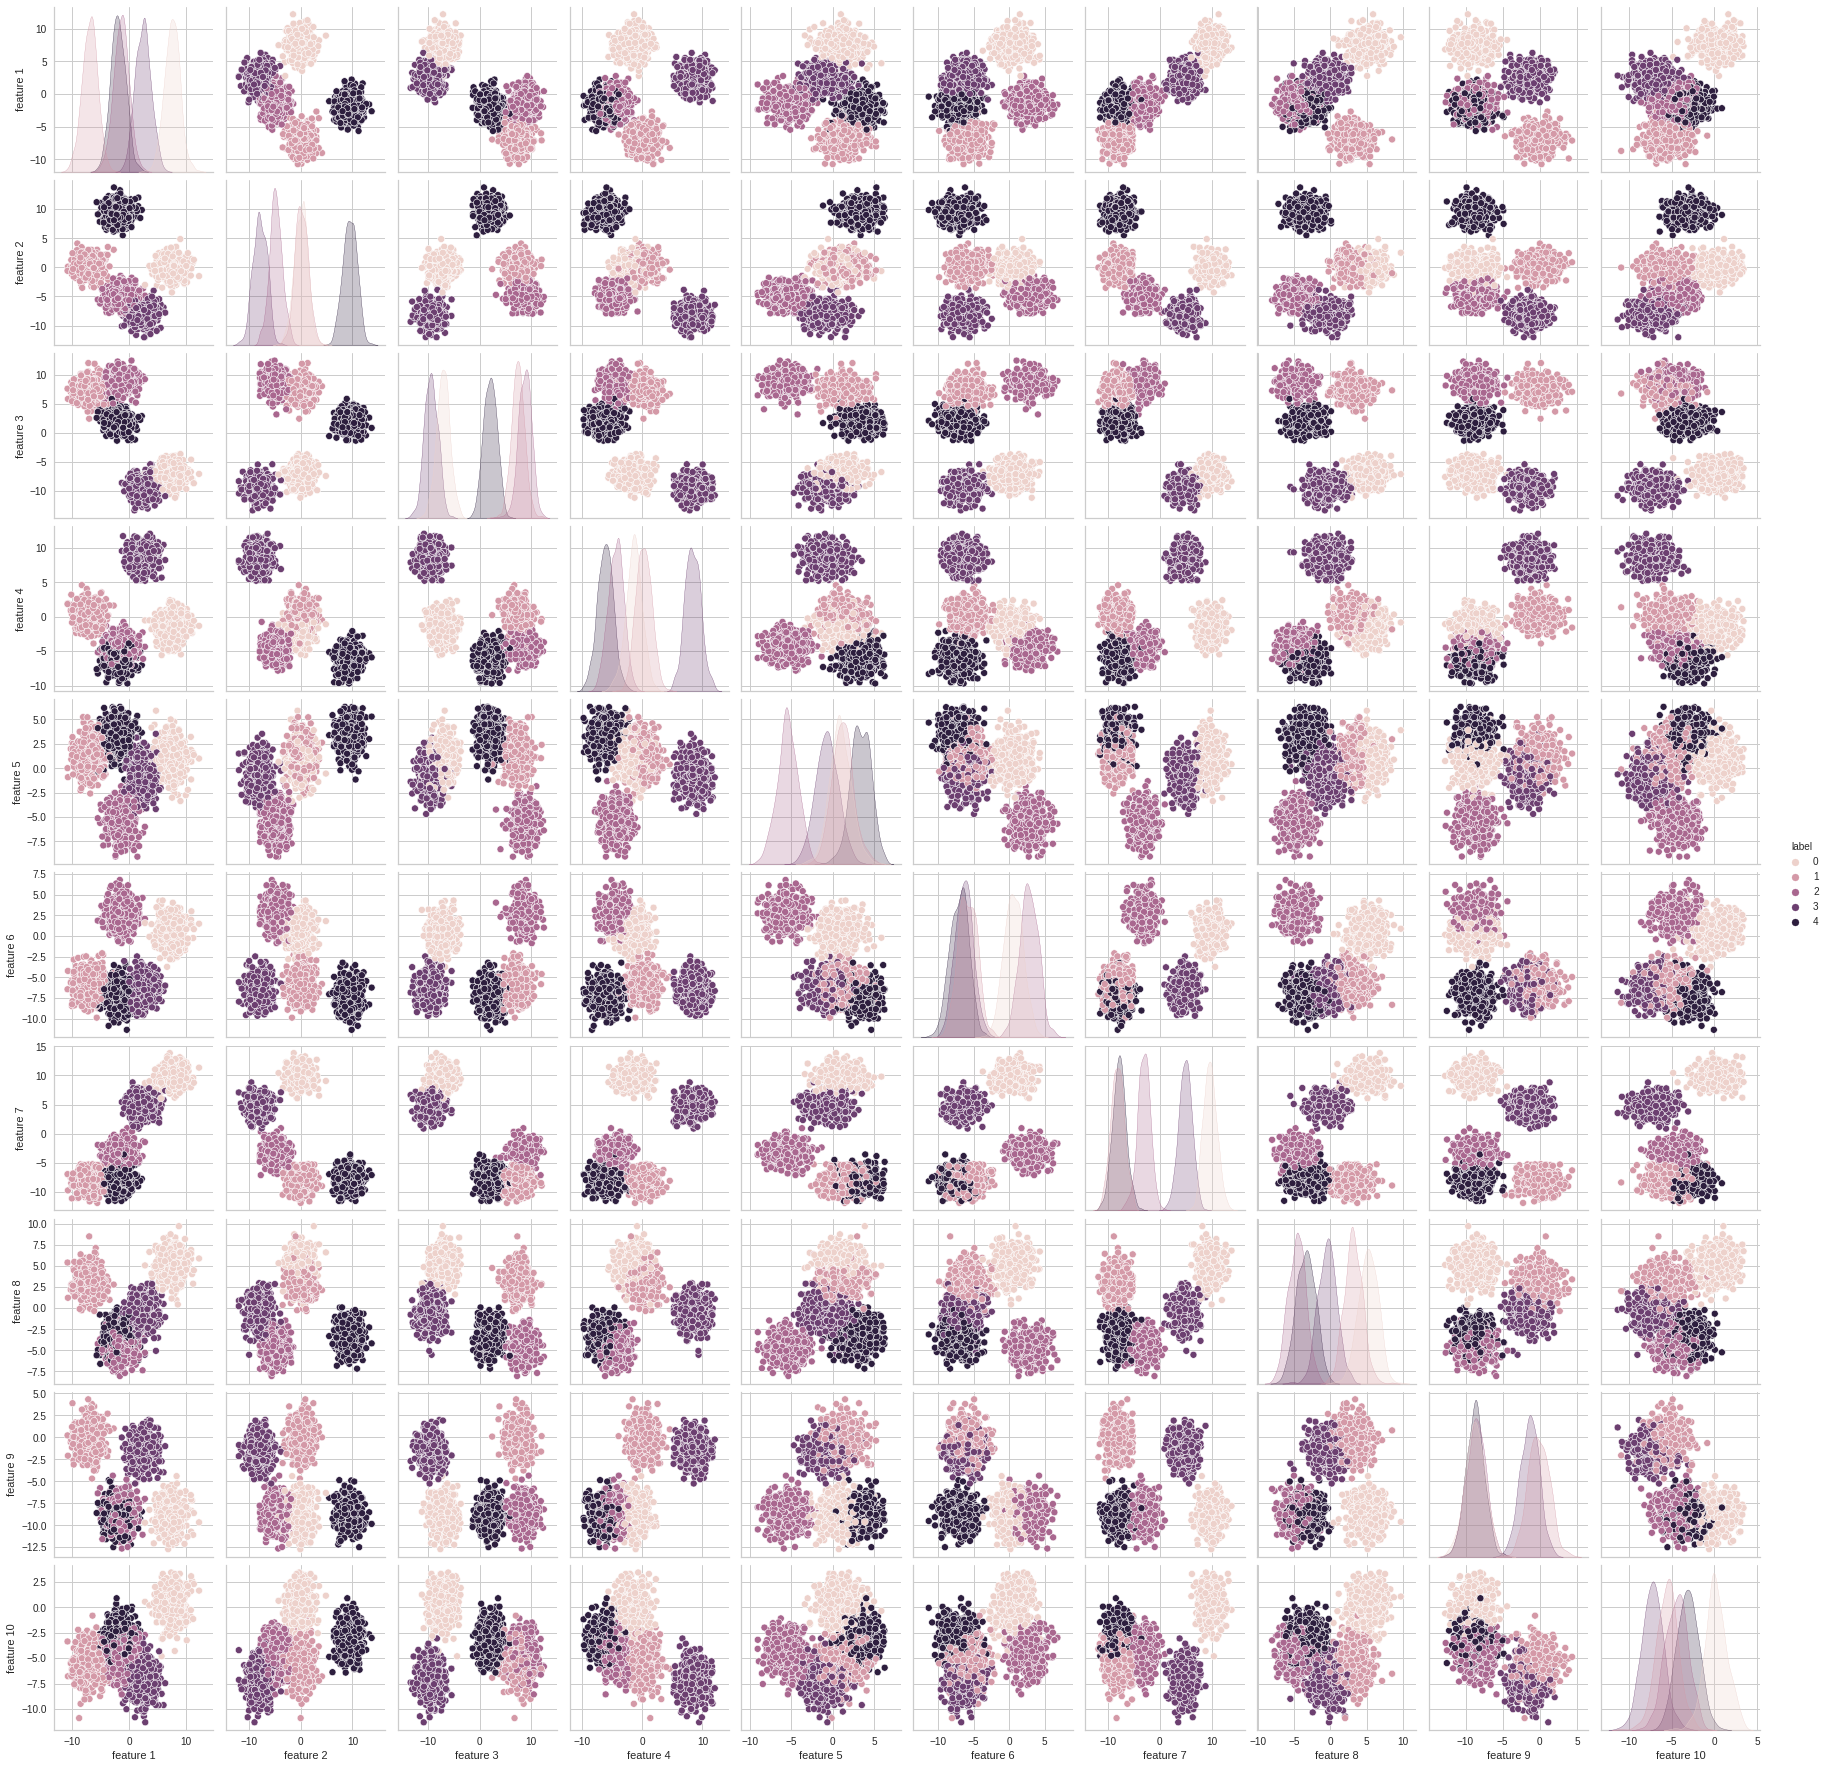

In [27]:
sns.pairplot(kmeans_data,hue='label')

## DBSCAN

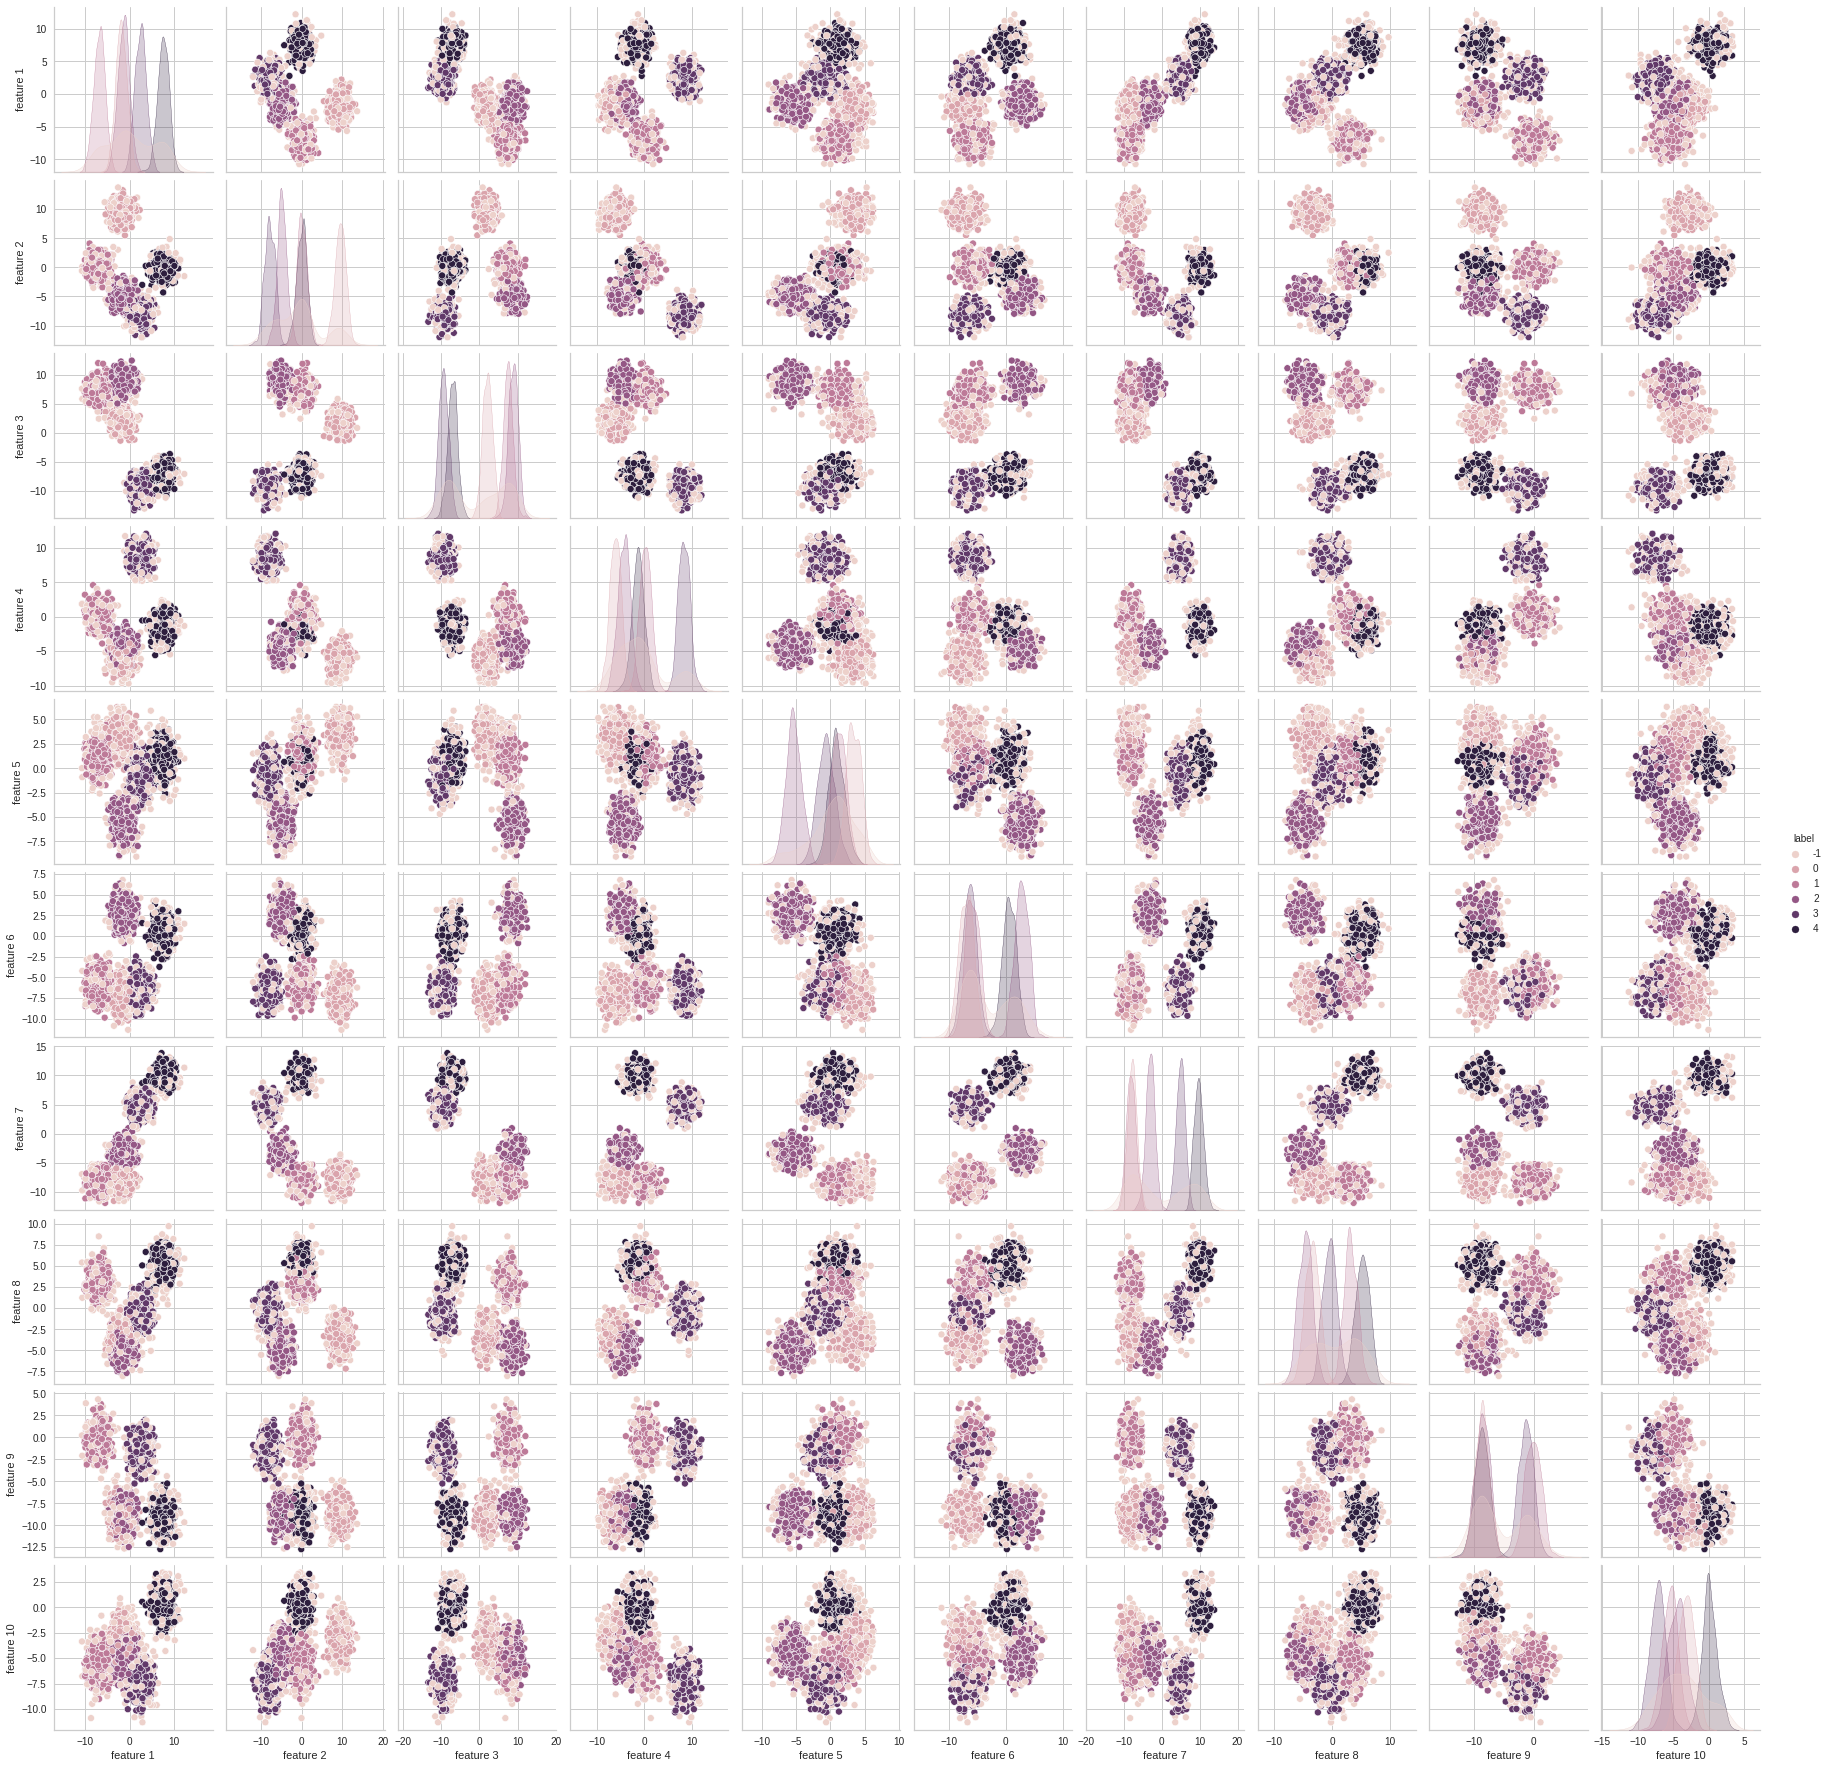

In [28]:
sns.pairplot(dbscan_data,hue='label')

# Clustering Validation

We use the Silhouette value and Davies Bouldin value to validate the clusters internally

0.6941079726950089
0.4391569957983631
0.4478877715662679
1.3724988746547948


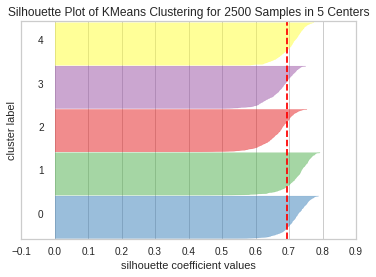

In [29]:
print(silhouette_score(scaled_data, kmean_labels, metric = 'euclidean'))
print(silhouette_score(scaled_data, dbscan_labels, metric = 'euclidean'))
print(davies_bouldin_score(scaled_data, kmean_labels))
print(davies_bouldin_score(scaled_data, dbscan_labels))

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(scaled_data)
visualizer.poof()


It's clear the Kmeans is more accurate, because we have large silhouette value, and also smaller davies bouldin value.

We decided to another clusters presentation technique, which can show how the clusters distribute in 2D plot.
We use PCA to reduce the dimension of the data to 2d and for DBSCAN we use 3D so we can see how the noise is around the cluster ball (which describe the way DBSCAN works)

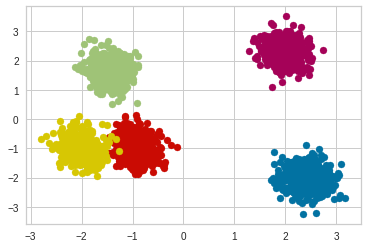

In [30]:
pca_2d = PCA(n_components=2).fit_transform(scaled_data)
PCs_2d = pd.DataFrame(pca_2d)
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_2d['label'] = kmean_labels

groups = PCs_2d.groupby('label')
for name, group in groups:
    pl.scatter(group["PC1_2d"], group["PC2_2d"])

pl.show()


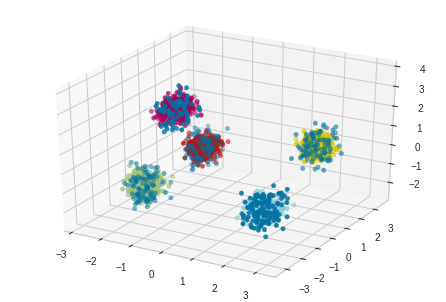

In [31]:
pca_2ddb = PCA(n_components=3).fit_transform(scaled_data)
PCs_2dd = pd.DataFrame(pca_2ddb)
PCs_2dd.columns = ["PC1_2d", "PC2_2d", "PC3_2d"]
PCs_2dd['label'] = dbscan_labels

fig = pl.figure()
ax = Axes3D(fig)

groups = PCs_2dd.groupby('label')
for name, group in groups:
    ax.scatter(group["PC1_2d"], group["PC2_2d"], group["PC3_2d"])

pl.show()